In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
import networkx as nx
from scipy import sparse as sp
from scipy.sparse import linalg as spla
%matplotlib inline

# Exercise 8

## Part B

We want to minimize $$\frac{1}{2}||y-x||_2^2 + \frac{\lambda}{2}x^TLx$$ over $x \in R^n$, where $L$ is the graph laplacian.
In part A we showed that this is equivalent to minimizing $$\frac{1}{2}||y-x||_2^2 + \frac{\lambda}{2}||Dx||_2^2$$.

We thus want to solve
\begin{align*}
\nabla_x[\frac{1}{2}||y-x||_2^2 + \frac{\lambda}{2}||Dx||_2^2] &= 0\\
\nabla_x[\frac{1}{2}(y-x)^T(y-x) + \frac{\lambda}{2}(Dx)^TDx] &= 0\\
\nabla_x[\frac{1}{2}(y^T-x^T)(y-x) + \frac{\lambda}{2}(Dx)^TDx] &= 0\\
\nabla_x[\frac{1}{2}(y^Ty - y^Tx -x^Ty + x^Tx) + \frac{\lambda}{2}x^TD^TDx] &= 0\\
\frac{1}{2}\nabla_x(y^Ty - 2y^Tx + x^Tx) + \frac{\lambda}{2}\nabla_x[x^TD^TDx] &= 0\\
\frac{1}{2} (- 2y + 2x) + \frac{\lambda}{2}2D^TDx &= 0\\
(x - y) + \lambda D^TDx &= 0\\
x + \lambda D^TD x &= y\\
(I+ \lambda D^TD)x &= y\\
\end{align*}

Thus we have that the solution $\hat{x}$ of the laplacian-smoothing objective solves the linear system $$C\hat{x} = b$$ where $C = I + \lambda D^TD$ and $b = y$.

## Part C

In [3]:
fmri = np.loadtxt('fmri_z.csv', delimiter=',', skiprows=1)


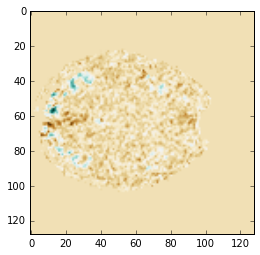

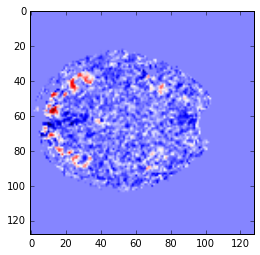

In [4]:
plt.imshow(fmri, cmap='BrBG')
plt.show()
plt.imshow(fmri, cmap='seismic')
plt.show()

In [5]:
def Jacobi(C, b, x, maxiters = 1000, tol=1e-7):
    '''
    This implements the Jacobi iterative solver for a linear system.
    Note, it is not super stable. At all. Nopenopenopenopenope.
    However, I need something in place here because I am a little bit behind.
    Plus this is a good example of what I might want to not do; I bet I could
    use this in a numerics class :)
    
    Anyway, here are the inputs:
    C: An NxN array
    b: An N vector
    x: An N vector initial guess for the linear system
    maxiters: optional Int, the max number of iterations for which to run the algorithm
    tol: An The error tolerance to determine convergence.
    
    '''
    d = np.diag(C)
    if (np.abs(d) <= 1e-10).sum() > 0:
        raise ValueError("The matrix diagonal of C must not contain zero elements")
    d = 1. / d
    R = C.copy()
    np.fill_diagonal(R, 0)
    Db = d * b
    DR = -d.reshape(C.shape[0],1) * R
    x0 = x
    for i in xrange(maxiters):
        x1 = Db + DR.dot(x0)
        if la.norm(x1 - x0) > tol:
            x0 = x1
        else:
            print i, "steps to converge"
            return x1
    print "Failed to converge"
    return x1

In [6]:
# Quick, stupid test case for Jacobi
A = np.array([[4,-1,-1],[-2, 6, 1], [-1,1,7]])
b = np.array([3,9,-6])
x = Jacobi(A, b, np.random.rand(3))
print x


18 steps to converge
[ 1.00000001  1.99999999 -1.00000001]


In [7]:
m,n = fmri.shape

In [8]:
# Generate D for an m x n grid using Networkx
G = nx.grid_2d_graph(m, n)
D = nx.incidence_matrix(G,oriented=True)

In [80]:
DTD = (D).dot(D.T)

In [81]:
m2, n2 = DTD.shape
I = sp.eye(m2, format='csc')
lam = 1.

In [82]:
C = I + lam * DTD
y = fmri.ravel()
x = spla.spsolve(C, y)
#x2 = Jacobi(C.toarray(), y, np.zeros(n2))

Y = C.dot(x).reshape(128,128)
X = x.reshape(128,128)
#X2 = x2.reshape(128,128)

75 steps to converge


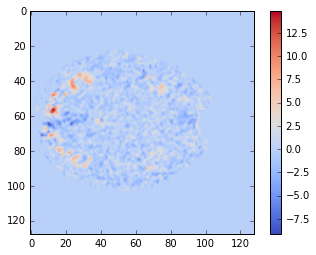

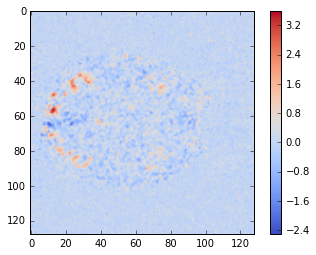

In [93]:
c = 'coolwarm'
plt.imshow(fmri, cmap=c)
plt.colorbar()
plt.show()
plt.imshow(X, cmap=c)
plt.colorbar()
plt.show()
#plt.imshow(X2, cmap=c)
#plt.show()

In [73]:
# Clearly, our Jacobi method is quite accurate in solving this system
la.norm(X - X2)

9.5398076104734806e-08

119.46323226978902